# Linear Regression in Machine Learning: A Beginner's Guide

This is a simple way to teach a computer to predict numbers, like guessing someone's house price based on its size. We'll explain everything step-by-step, assuming you know nothing about machine learning. We'll use Python code with only three libraries: `os`, `numpy`, and `matplotlib`. Each code snippet includes comments explaining what these libraries do.

## 1. What is Linear Regression?

Imagine you notice that bigger houses tend to cost more. Linear Regression is like drawing a straight line through a graph of house sizes and prices to predict the price of any house based on its size. The "line" is the key: it assumes the relationship between size (input) and price (output) is straight, not curvy or random.

### 1.1 The Equation
The line is described by this equation:

$$ y = w_0 + w_1 \cdot x $$ 

- **$y$**: The number we want to predict (e.g., house price).
- **$x$**: The input we know (e.g., house size).
- **$w_0$**: The "starting point" of the line on the graph (where it crosses the y-axis when $x = 0$).
- **$w_1$**: The "slope" of the line, showing how much $y$ changes when $x$ increases by 1.
- **Example**: If $w_0 = 50,000$ and $w_1 = 100$, then for a house of size $x = 1000$ square feet, the predicted price is $y = 50,000 + 100 \cdot 1000 = 150,000$.

### 1.2 Why a Line?
A straight line is the simplest way to connect inputs to outputs. It’s easy to understand and works well for patterns that are roughly linear (like house size vs. price). However, real data has noise (random variations), so our line won’t be perfect—it’s a "best guess."

### 1.3 Goal
We need to find the best $ w_0 $ and $ w_1 $ so our line fits the data as closely as possible. "Fitting" means the predicted $ y $ values are close to the actual prices.

## 2. Building the Model (Theory)

To find the best line, we measure how "wrong" our predictions are using a **loss function** called **Mean Squared Error (MSE)**:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

- **$ n $**: Number of data points (e.g., number of houses).
- **$ y_i $**: Actual value (e.g., real house price for the $ i $-th house).
- **$ \hat{y}_i $**: Predicted value (e.g., price from our line: $ \hat{y}_i = w_0 + w_1 \cdot x_i $).
- **$ (y_i - \hat{y}_i)^2 $**: Squared difference between actual and predicted values, making errors positive and emphasizing big mistakes.
- **$ \frac{1}{n} \sum $**: Averages the squared errors over all data points.

### Why MSE?
- **Squares Errors**: Ensures all errors are positive and big errors (e.g., predicting $100,000 when the price is $200,000) are penalized more.
- **Average**: Gives a single number to measure overall error, so we can compare different lines.

### Finding the Best Line
We use **Gradient Descent**, a method to tweak $ w_0 $ and $ w_1 $ to make MSE as small as possible. It’s like adjusting the line’s position and slope bit by bit until it fits the data well. The update rules are:

$w_1 \leftarrow w_1 - \alpha \cdot \frac{\partial \text{MSE}}{\partial w_1}$

$w_0 \leftarrow w_0 - \alpha \cdot \frac{\partial \text{MSE}}{\partial w_0}$

- **$ \alpha $**: Learning rate, a small number (e.g., 0.01) controlling how big each tweak is.
- **$ \frac{\partial \text{MSE}}{\partial w_1} $** and **$ \frac{\partial \text{MSE}}{\partial w_0} $**: Gradients, showing how much MSE changes if we adjust $ w_1 $ or $ w_0 $. They point to the direction that reduces error.

### Why Gradient Descent?
- **Efficient**: Works for large datasets by making small, iterative improvements.
- **Flexible**: Can be extended to add features like regularization (explained later).

## Libraries and their purpose

1. Numpy is a special library in Python that we will use for speeding up a lot of our machine learning algorithms.
2. matplotlib for plotting our output nicely (there is also seaborn, which is a bit nicer in my opinion).
3. os is useful for file handling and saving them.

In [1]:
# Linear Regression Example with Gradient Descent
# This script demonstrates a simple linear regression model using gradient descent.
import numpy as np
import matplotlib.pyplot as plt
import os

## Class Overview
This class implements a simple linear regression model using gradient descent optimisation (this will be covered later on in this notebook). It learns the relationship between input features (X) and target values (y) by finding the best-fitting straight line.

learning_rate ($\alpha$): Controls how big each adjustment step is during training

Typical values: 0.001 to 0.1

Too high $\rightarrow$ Model might overshoot optimal values

Too low $\rightarrow$ Training takes longer

n_iterations: Number of times to update the weights

Also called "epochs"

More iterations → More precise results (up to a point)

The learning rate is a hyperparameter in machine learning and statistics that acts as a tuning parameter in optimization algorithms, determining the step size at each iteration while moving toward a minimum of a loss function. It is a critical factor in the training process, as it controls how much a model adjusts its parameters in response to the estimated error during each update.

The learning rate influences the speed at which a model "learns" and affects both the convergence rate and the risk of overshooting the optimal solution. A high learning rate may cause the model to jump over minima, while a low learning rate can result in a slow convergence or getting stuck in a local minimum. (This has been explained in the maths folder/notebook).

The LinearRegression class implements a linear regression model using gradient descent to predict a continuous target variable based on one or more input features. Here's a clear, concise explanation of what’s happening in the class:

## Purpose
The class is designed to:

Fit a linear model (a straight line or hyperplane) to data by learning the optimal slope (w1) and intercept (w0).
Predict target values for new input data using the learned model.
The model assumes a linear relationship:

$y = w0 + w1 * X$, where:

* $y$: Target values (e.g., house prices).
* $X$: Input features (e.g., house sizes).
* $w0$: Intercept (bias, where the line crosses the y-axis).
* $w1$: Slope (weight, how much each feature affects the prediction).

### Class Structure

##### 1. ```__init__(self, learning_rate=0.01, n_iterations=1000)```
Initialises the model with:

* ```learning_rate```: Controls how large the steps are when adjusting w0 and w1 during gradient descent (default: 0.01).

* ```n_iterations```: Number of times to update w0 and w1 during training (default: 1000).

* ```w1```: Slope(s), initialized to None (set later based on the number of features).

* ```w0```: Intercept, initialized to None (set to 0 during training).

* ```loss_history```: Empty list to store the Mean Squared Error (MSE) at each iteration for tracking training progress.

#### 2. ```fit(self, X, y)```
This method trains the model using gradient descent to minimize the prediction error.

#### Inputs:

* ```X```: Input features, a matrix of shape ```(n_samples, n_features)``` (e.g., rows are houses, columns are features like size or number of bedrooms).

* ```y```: Target values, an array of shape ```(n_samples,)``` (e.g., house prices).

#### Steps:

Initialise Parameters:

* Gets the number of samples and features from ```X.shape```.

* Sets $w1$ to a zero array of size ```n_features``` (one slope per feature).

* Sets $w0$ to $0$ (single intercept).

* Gradient Descent Loop ```(runs n_iterations times)```:

* Prediction: Computes ```y_pred = w0 + w1 * X``` using matrix multiplication ```(np.dot(X, w1))``` plus the intercept w0.

* Loss Calculation: Computes the Mean Squared Error (MSE):

* MSE = ```(1/n_samples) * sum((y_pred - y)^2)```

This measures the average squared difference between predictions and actual values. The loss is stored in loss_history.

#### Gradient Calculation:

Computes gradients for w1 and w0, which indicate how much to adjust them to reduce the MSE:

* ```dw1 = (2/n_samples) * X.T * (y_pred - y)```: Gradient for weights (uses matrix transpose X.T for multi-feature support).

* ```dw0 = (2/n_samples) * sum(y_pred - y)```: Gradient for the intercept.

* The factor ```2/n_samples``` comes from the derivative of the MSE with respect to ```w1 and w0```.

Update Parameters:

Adjusts $w1$ and $w0$ by subtracting the gradient scaled by the learning rate:

* ```w1 = w1 - learning_rate * dw1``` 

* ```w0 = w0 - learning_rate * dw0```

Smaller ```learning_rate``` means slower, more stable updates; larger means faster but riskier.

#### 3. ```predict(self, X)```

Uses the learned $w0$ and $w1$ to predict target values for new input data X.

* Formula: ```y_pred = w0 + w1 * X``` (computed as ```np.dot(X, w1) + w0```).

Returns an array of predictions for each input sample.

Key Concepts: The LinearRegression class implements a linear regression model using gradient descent to predict a continuous target variable based on one or more input features. Here's a clear, concise explanation of what’s happening in the class:

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        # Initialize learning rate (how fast we adjust the line) and number of iterations.
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w1 = None  # Slope (weight)
        self.w0 = None  # Intercept (bias)
        self.loss_history = []  # Store MSE at each iteration to track progress

    def fit(self, X, y):
        # X: Input data (e.g., house sizes), shape (n_samples, n_features)
        # y: Target data (e.g., house prices), shape (n_samples,)
        n_samples, n_features = X.shape
        self.w1 = np.zeros(n_features)  # Start with w1 = 0 for each feature
        self.w0 = 0  # Start with w0 = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Predict: y_pred = w0 + w1 * X
            y_pred = np.dot(X, self.w1) + self.w0  # np.dot: Matrix multiplication
            # Compute MSE: (1/n) * sum((y_pred - y)^2)
            loss = np.mean((y_pred - y) ** 2)  # np.mean: Average of array
            self.loss_history.append(loss)
            # Gradients: How much to adjust w1 and w0
            dw1 = (2 / n_samples) * np.dot(X.T, (y_pred - y))  # X.T: Transpose of X
            dw0 = (2 / n_samples) * np.sum(y_pred - y)  # np.sum: Sum of array
            # Update w1 and w0
            self.w1 -= self.learning_rate * dw1
            self.w0 -= self.learning_rate * dw0

    def predict(self, X):
        # Predict new y values using the learned w0 and w1
        return np.dot(X, self.w1) + self.w0

## Data Visualisation

We can then use our fit function to tune the model. Matplotlib has been used to show the output below for our synthetic data. Obviously, try to use real data. 

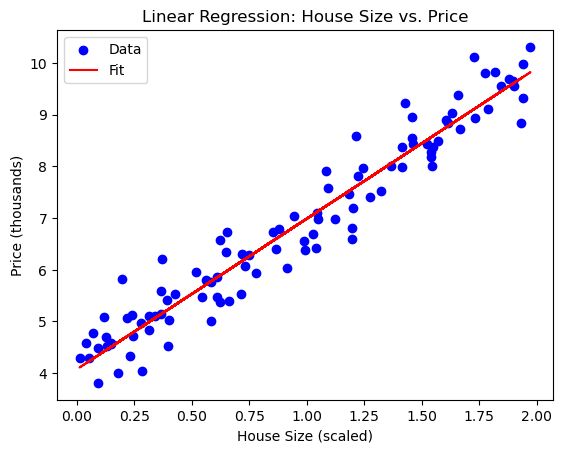

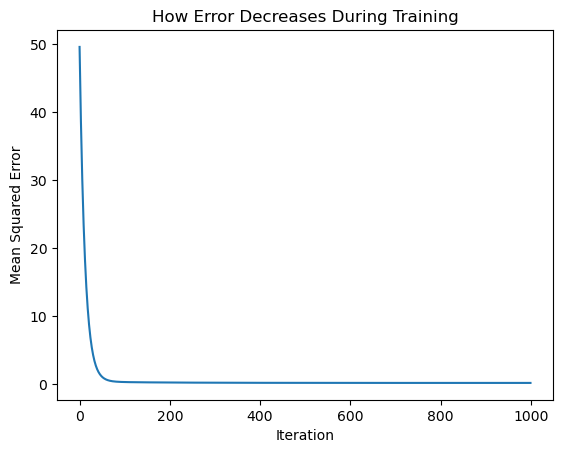

In [3]:
# Create fake data to test the model
np.random.seed(42)  # np.random.seed: Ensures same random numbers each run
X = 2 * np.random.rand(100, 1)  # 100 random house sizes (0 to 2)
y = 4 + 3 * X.flatten() + np.random.randn(100) * 0.5  # Prices: 4 + 3x + noise
# np.random.rand: Random numbers 0-1; np.random.randn: Random normal numbers

# Train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)
y_pred = model.predict(X)

# Plot data and the fitted line
plt.scatter(X, y, color='blue', label='Data')  # plt.scatter: Plot points
plt.plot(X, y_pred, color='red', label='Fit')  # plt.plot: Plot line
plt.xlabel('House Size (scaled)')
plt.ylabel('Price (thousands)')
plt.title('Linear Regression: House Size vs. Price')
plt.legend()  # plt.legend: Show label key
plt.show()  # plt.show: Display plot

# Plot how MSE decreases during training
plt.plot(model.loss_history)  # Plot list of losses
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('How Error Decreases During Training')
plt.show()